In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import urllib.request
import seaborn as sns
import plotly.express as px

In [ ]:
url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'
# Faz a requisição HTTP
response = urllib.request.urlopen(url)
# Carrega os dados JSON
dados = json.load(response)

#Transformando dataset

In [ ]:
dados_normalizados = pd.json_normalize(dados)
dados_normalizados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
#visualizando valores vazios na coluna 'account.Charges.Total'
dados_normalizados[dados_normalizados['account.Charges.Total'] == ' '].head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,


In [ ]:
#identificando relações entres colunas que possuem a coluna 'account.Charges.Total' sem valores.
dados_normalizados[dados_normalizados['account.Charges.Total'] == ' '][
    ['customer.tenure', 'account.Contract', 'account.Charges.Monthly', 'account.Charges.Total']
]

,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total
975,0,Two year,56.05,
1775,0,Two year,20.00,
1955,0,Two year,61.90,
2075,0,One year,19.70,
2232,0,Two year,20.25,
2308,0,Two year,25.35,
2930,0,Two year,73.35,
3134,0,Two year,25.75,
3203,0,Two year,52.55,
4169,0,Two year,80.85,


In [ ]:
#colocando os indices de cada linha em uma lista
idx = dados_normalizados[dados_normalizados['account.Charges.Total'] == ' '].index

In [ ]:
#multiplicando o valores da coluna 'account.Charges.Monthly' por 24 e colocando o resultado na coluna 'account.Charges.Total'
dados_normalizados.loc[idx, "account.Charges.Total"] = dados_normalizados.loc[idx, "account.Charges.Monthly"] * 24

In [ ]:
#inserindo a quantidade de meses na coluna 'customer.tenure'
dados_normalizados.loc[idx, "customer.tenure"] = 24

In [ ]:
#visualizando as alterações feitas acima
dados_normalizados.loc[idx][['customer.tenure', 'account.Contract', 'account.Charges.Monthly', 'account.Charges.Total']]

,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total
975,24,Two year,56.05,1345.2
1775,24,Two year,20.00,480.0
1955,24,Two year,61.90,1485.6
2075,24,One year,19.70,472.8
2232,24,Two year,20.25,486.0
2308,24,Two year,25.35,608.4
2930,24,Two year,73.35,1760.4
3134,24,Two year,25.75,618.0
3203,24,Two year,52.55,1261.2
4169,24,Two year,80.85,1940.4


In [ ]:
#nas alterações acima eu identifiquei um erro na atribuição dos valores da linha 2075, fiz o seguite para corrigir:

dados_normalizados.loc[2075, "account.Charges.Total"] = dados_normalizados.loc[2075, "account.Charges.Monthly"] * 12
dados_normalizados.loc[2075, "customer.tenure"] = 12

#visualizando as alterações feitas acima
dados_normalizados.loc[idx][['customer.tenure', 'account.Contract', 'account.Charges.Monthly', 'account.Charges.Total']]

,customer.tenure,account.Contract,account.Charges.Monthly,account.Charges.Total
975,24,Two year,56.05,1345.2
1775,24,Two year,20.00,480.0
1955,24,Two year,61.90,1485.6
2075,12,One year,19.70,236.4
2232,24,Two year,20.25,486.0
2308,24,Two year,25.35,608.4
2930,24,Two year,73.35,1760.4
3134,24,Two year,25.75,618.0
3203,24,Two year,52.55,1261.2
4169,24,Two year,80.85,1940.4


In [ ]:
#alterando o tipo da coluna 'account.Charges.Total' de 'object' para 'float'
dados_normalizados['account.Charges.Total'] = dados_normalizados['account.Charges.Total'].astype(float)

In [ ]:
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#identificando e tratando strings vazias

In [ ]:
#vai retornar cada valor único em cada coluna
for col in dados_normalizados.columns:
    print(f"Coluna: {col}")
    print(dados_normalizados[col].unique())
    print("-" * 30)

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Coluna: Churn
['No' 'Yes' '']
------------------------------
Coluna: customer.gender
['Female' 'Male']
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
['Yes' 'No']
------------------------------
Coluna: customer.Dependents
['Yes' 'No']
------------------------------
Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42]
------------------------------
Coluna: phone.PhoneService
['Yes' 'No']
------------------------------
Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']
-------------------------

In [ ]:
#visualizando dados vazios na coluna 'Churn'
dados_normalizados.query("Churn == ''")

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [ ]:
#visualizando dados que não são vazios na coluna 'Churn'
dados_normalizados[dados_normalizados['Churn'] != '']

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
#fazendo uma cópia desse dataframe sem linhas com valores vazios na coluna 'Churn'
dados_tratados = dados_normalizados[dados_normalizados['Churn'] != ''].copy()

In [ ]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [ ]:
#resetando o index do df
dados_tratados.reset_index(drop=True, inplace=True)

In [ ]:
dados_tratados

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#identificando dados duplicados

In [ ]:
#identificando se há linhas duplicadas
dados_tratados.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [ ]:
#somando a quantidade de linhas duplicadas
dados_tratados.duplicated().sum()

0

#identificando dados nulos

In [ ]:
#identificando valores nulos
dados_tratados.isna()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#somatória dos valores nulos em cada coluna
dados_tratados.isna().sum()

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64

#trabalhando com outliers

In [ ]:
#visualizando a descrição dos dados
dados_tratados.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.406929,64.761692,2281.253259
std,0.368612,24.529338,30.090047,2265.703526
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.900000
50%,0.000000,29.000000,70.350000,1396.250000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
import seaborn as sns

<Axes: xlabel='customer.tenure'>

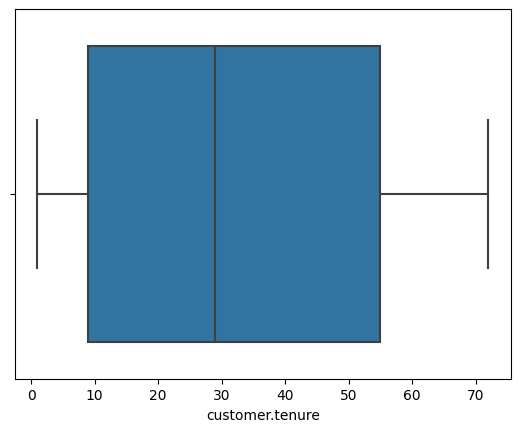

In [ ]:
sns.boxplot(x=dados_tratados['customer.tenure'])

#Substituindo valores (tranformando em binário)

In [ ]:
dados_sem_id = dados_tratados.drop('customerID', axis=1).copy()
dados_sem_id

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
#neste passo eu tranformo em '0' e '1' apenas valores que contém 'Yes' ou 'No' e 'Male' ou 'Female'.
#vou definir isso no 'mapeamento'

mapeamento = {
    'No': 0,
    'Yes': 1,
    'Male': 0,
    'Female': 1
}

In [ ]:
#visualizando as informações
for col in dados_sem_id.columns:
    print(f"Coluna: {col}")
    print(dados_sem_id[col].unique())
    print("-" * 30)

Coluna: Churn
['No' 'Yes']
------------------------------
Coluna: customer.gender
['Female' 'Male']
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
['Yes' 'No']
------------------------------
Coluna: customer.Dependents
['Yes' 'No']
------------------------------
Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
------------------------------
Coluna: phone.PhoneService
['Yes' 'No']
------------------------------
Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']
------------------------------
Coluna: internet.OnlineSecurity
['No' 'Yes' 'No internet service']
------------------------------
Coluna: internet.OnlineBackup
['Ye

In [ ]:
#definindo as colunas
colunas = ['Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService', 'account.PaperlessBilling']

In [ ]:
#alterando os dados
dados_sem_id[colunas] = dados_sem_id[colunas].replace(mapeamento)
dados_sem_id

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0,1,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30
1,0,0,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40
2,1,0,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85
3,1,0,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85
4,1,1,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,0,Mailed check,55.15,742.90
7039,1,0,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70
7040,0,0,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75
7041,0,0,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65


In [ ]:
#visualizando os mesmos dados após a transformação
for col in dados_sem_id.columns:
    print(f"Coluna: {col}")
    print(dados_sem_id[col].unique())
    print("-" * 30)

Coluna: Churn
[0 1]
------------------------------
Coluna: customer.gender
[1 0]
------------------------------
Coluna: customer.SeniorCitizen
[0 1]
------------------------------
Coluna: customer.Partner
[1 0]
------------------------------
Coluna: customer.Dependents
[1 0]
------------------------------
Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
------------------------------
Coluna: phone.PhoneService
[1 0]
------------------------------
Coluna: phone.MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Coluna: internet.InternetService
['DSL' 'Fiber optic' 'No']
------------------------------
Coluna: internet.OnlineSecurity
['No' 'Yes' 'No internet service']
------------------------------
Coluna: internet.OnlineBackup
['Yes' 'No' 'No internet service']
---------

#one hot endcoder (dummy)

In [ ]:
#transformando as demais colunas em dados binários automaticamente
pd.get_dummies(dados_sem_id)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,1,0,1,1,9,1,1,65.60,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,9,1,0,59.90,542.40,...,0,0,1,1,0,0,0,0,0,1
2,1,0,0,0,0,4,1,1,73.90,280.85,...,1,0,0,1,0,0,0,0,1,0
3,1,0,1,1,0,13,1,1,98.00,1237.85,...,0,0,1,1,0,0,0,0,1,0
4,1,1,1,1,0,3,1,1,83.90,267.40,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,0,0,13,1,0,55.15,742.90,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,0,1,0,22,1,1,85.10,1873.70,...,0,0,1,1,0,0,0,0,1,0
7040,0,0,0,0,0,2,1,1,50.30,92.75,...,1,0,0,1,0,0,0,0,0,1
7041,0,0,0,1,1,67,1,0,67.85,4627.65,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df_dummies = pd.get_dummies(dados_sem_id, dtype=int).copy()
df_dummies.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,...,internet.StreamingMovies_No,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,1,0,1,1,9,1,1,65.6,593.30,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,9,1,0,59.9,542.40,...,0,0,1,1,0,0,0,0,0,1
2,1,0,0,0,0,4,1,1,73.9,280.85,...,1,0,0,1,0,0,0,0,1,0
3,1,0,1,1,0,13,1,1,98.0,1237.85,...,0,0,1,1,0,0,0,0,1,0
4,1,1,1,1,0,3,1,1,83.9,267.40,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Churn                                            7043 non-null   int64  
 1   customer.gender                                  7043 non-null   int64  
 2   customer.SeniorCitizen                           7043 non-null   int64  
 3   customer.Partner                                 7043 non-null   int64  
 4   customer.Dependents                              7043 non-null   int64  
 5   customer.tenure                                  7043 non-null   int64  
 6   phone.PhoneService                               7043 non-null   int64  
 7   account.PaperlessBilling                         7043 non-null   int64  
 8   account.Charges.Monthly                          7043 non-null   float64
 9   account.Charges.Total         

#Variável Target (balanceamento dos dados)

In [ ]:
contagem_classes = df_dummies['Churn'].value_counts()
print(contagem_classes)

0    5174
1    1869
Name: Churn, dtype: int64


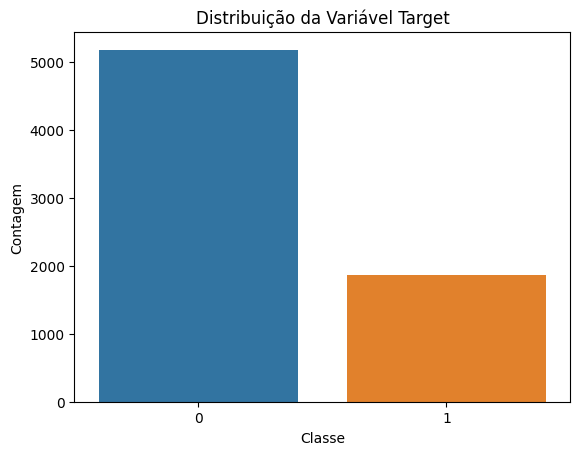

In [ ]:
sns.countplot(x='Churn', data=df_dummies)
plt.title('Distribuição da Variável Target')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

In [ ]:
proporcoes = df_dummies['Churn'].value_counts(normalize=True)
print(proporcoes)

0    0.73463
1    0.26537
Name: Churn, dtype: float64


e agora para balancear os dados

In [ ]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta

X = df_dummies.drop('Churn', axis = 1)
y = df_dummies['Churn']

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [ ]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,phone.MultipleLines_No,...,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_Month-to-month,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Bank transfer (automatic),account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check,Churn
0,1,0,1,1,9,1,1,65.6,593.3,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,9,1,0,59.9,542.4,0,...,0,1,1,0,0,0,0,0,1,0


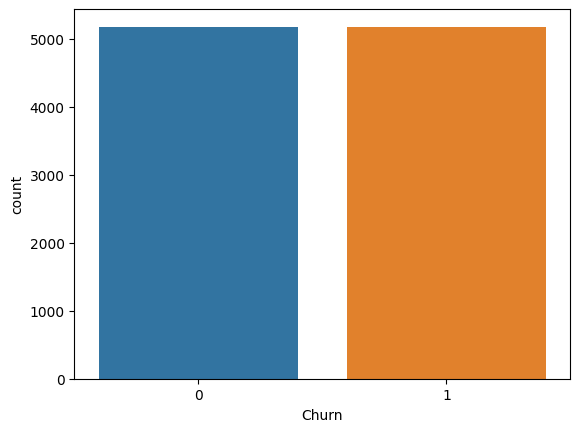

In [ ]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

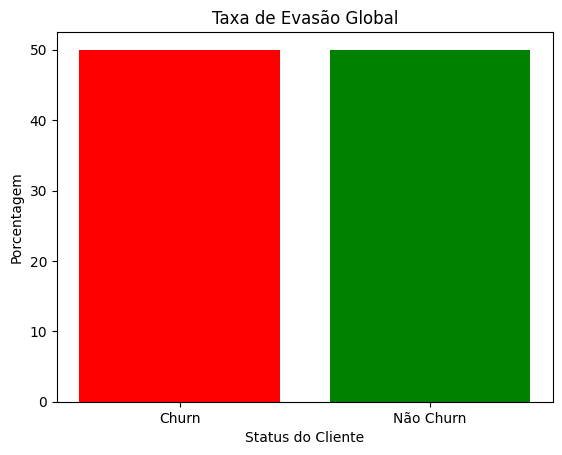

In [ ]:
#Taxa de evasão em porcentagem
churn_rate = dados_final['Churn'].mean() * 100
taxa_evasao = churn_rate
labels = ['Churn', 'Não Churn']
values = [taxa_evasao, 100 - taxa_evasao]

plt.bar(labels, values, color=['red', 'green'])
plt.xlabel('Status do Cliente')
plt.ylabel('Porcentagem')
plt.title('Taxa de Evasão Global')
plt.show()

#criando visualizações com auxílio do CHATGPT

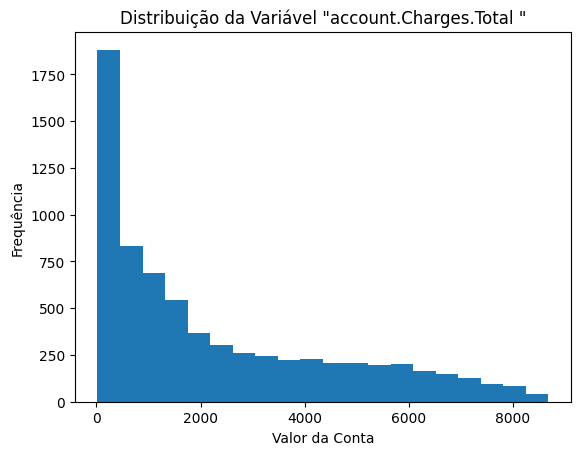

In [ ]:
#Gráfico de barras para 'account.Charges.Total' em relação a frequencia dos valores no DF

plt.hist(df_dummies['account.Charges.Total'], bins=20)
plt.xlabel('Valor da Conta')
plt.ylabel('Frequência')
plt.title('Distribuição da Variável "account.Charges.Total "')
plt.show()

In [ ]:
#visualizando colunas do DF
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 41 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customer.gender                                  10348 non-null  int64  
 1   customer.SeniorCitizen                           10348 non-null  int64  
 2   customer.Partner                                 10348 non-null  int64  
 3   customer.Dependents                              10348 non-null  int64  
 4   customer.tenure                                  10348 non-null  int64  
 5   phone.PhoneService                               10348 non-null  int64  
 6   account.PaperlessBilling                         10348 non-null  int64  
 7   account.Charges.Monthly                          10348 non-null  float64
 8   account.Charges.Total                            10348 non-null  float64
 9   phone.MultipleLines_No      

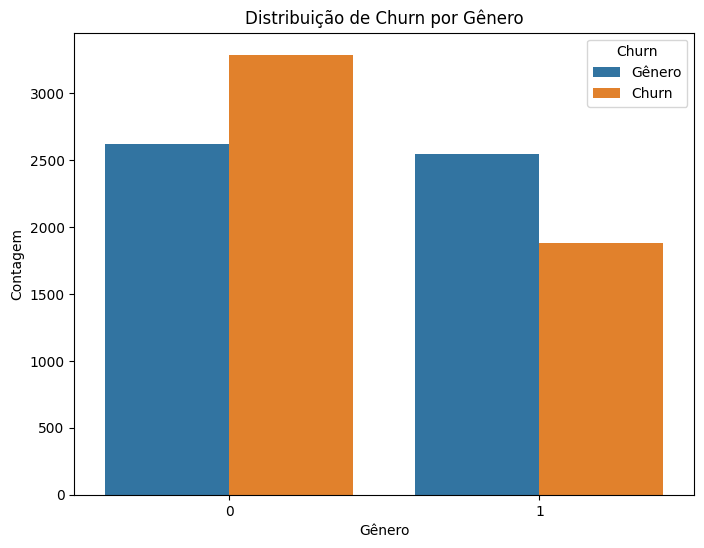

In [ ]:
#Gráfico de barras para 'gender' em relação ao Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='customer.gender', hue='Churn', data=dados_final)
plt.title('Distribuição de Churn por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Gênero', 'Churn'])
plt.show()

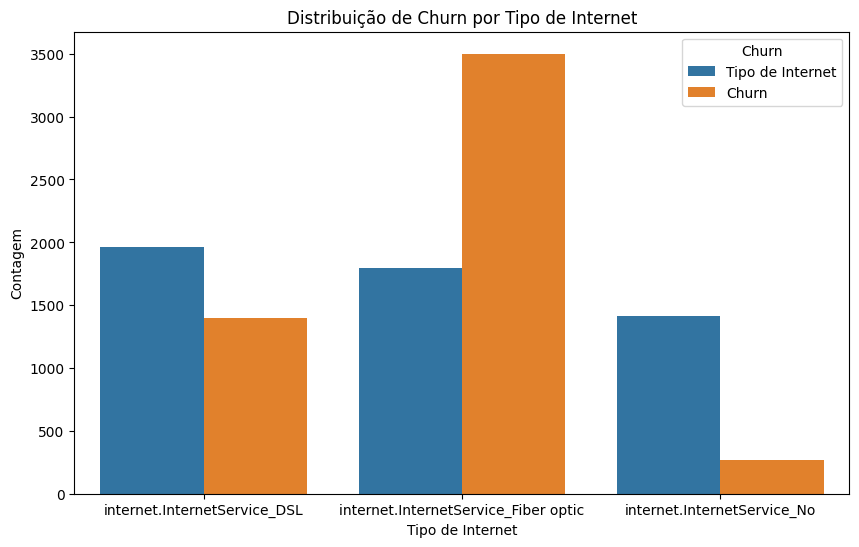

In [ ]:
#Gráfico de barras para 'internet.InternetService' em relação ao Churn
dados_final['Tipo de Internet'] = dados_final[['internet.InternetService_DSL', 'internet.InternetService_Fiber optic', 'internet.InternetService_No']].idxmax(axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(data=dados_final, x='Tipo de Internet', hue='Churn')
plt.title('Distribuição de Churn por Tipo de Internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Tipo de Internet', 'Churn'])
plt.show()

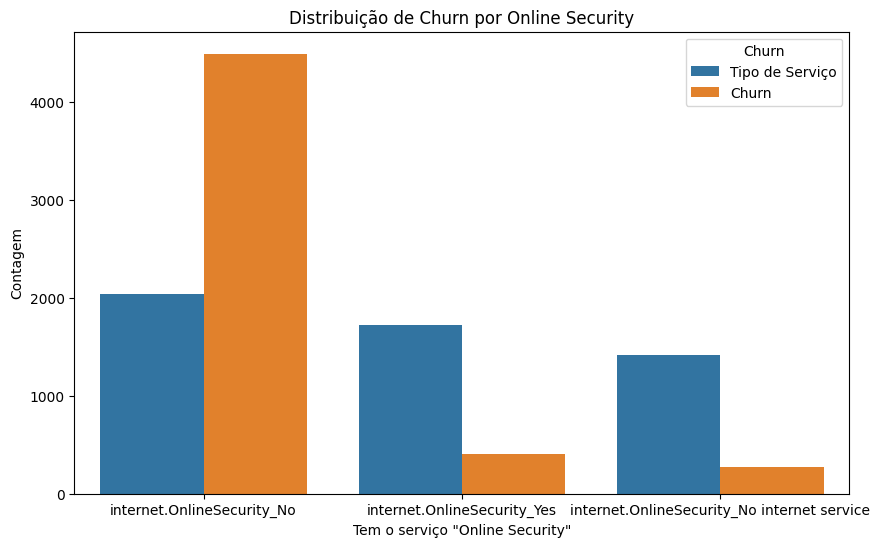

In [ ]:
#Gráfico de barras para 'OnliseSecurity' em relação ao churn
dados_final['Tipo de Servico'] = dados_final[['internet.OnlineSecurity_No','internet.OnlineSecurity_Yes','internet.OnlineSecurity_No internet service']].idxmax(axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo de Servico', hue='Churn', data=dados_final)
plt.title('Distribuição de Churn por Online Security')
plt.xlabel('Tem o serviço "Online Security"')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Tipo de Serviço', 'Churn'])
plt.show()

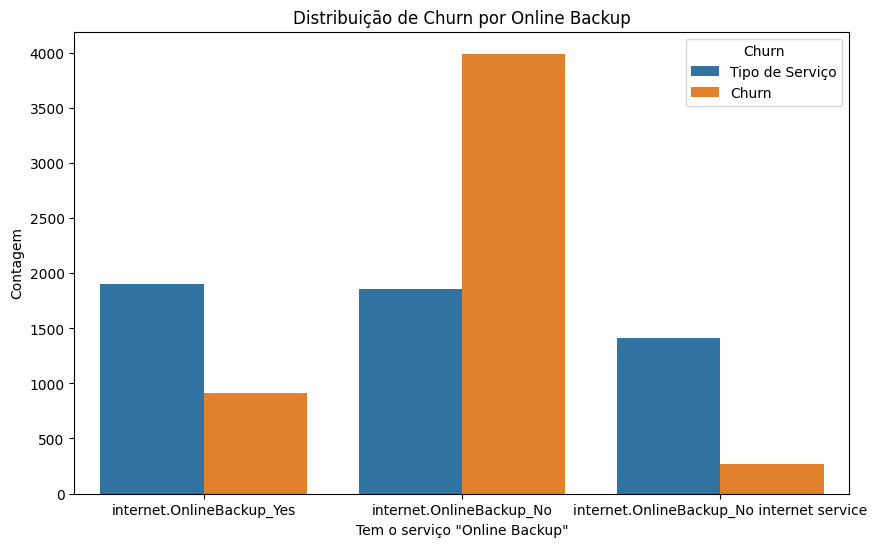

In [ ]:
#Gráfico de barras para 'OnliseBackup' em relação ao churn
dados_final['Servico OnlineBackup'] = dados_final[['internet.OnlineBackup_No','internet.OnlineBackup_Yes','internet.OnlineBackup_No internet service',]].idxmax(axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(x='Servico OnlineBackup', hue='Churn', data=dados_final)
plt.title('Distribuição de Churn por Online Backup')
plt.xlabel('Tem o serviço "Online Backup"')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Tipo de Serviço', 'Churn'])
plt.show()

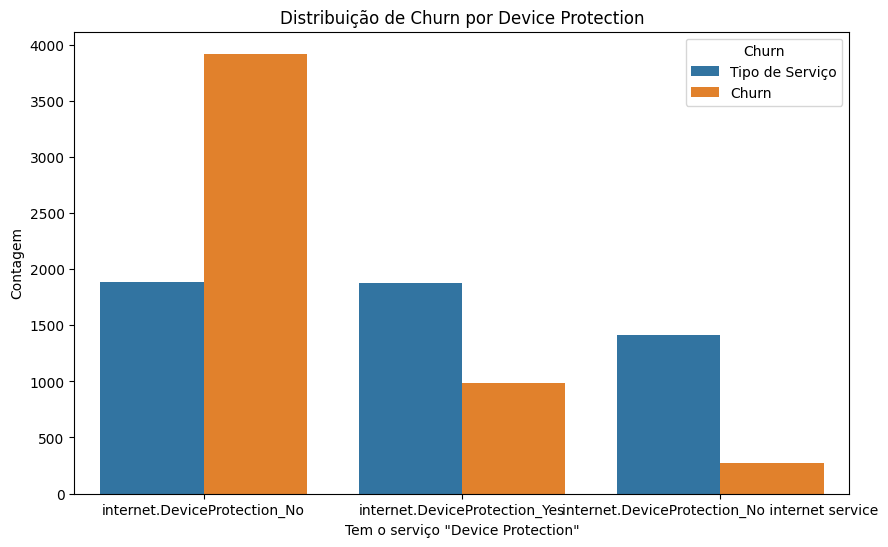

In [ ]:
#Gráfico de barras para 'DeviceProtection' em relação ao churn
dados_final['Servico DeviceProtection'] = dados_final[['internet.DeviceProtection_No','internet.DeviceProtection_Yes','internet.DeviceProtection_No internet service',]].idxmax(axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(x='Servico DeviceProtection', hue='Churn', data=dados_final)
plt.title('Distribuição de Churn por Device Protection')
plt.xlabel('Tem o serviço "Device Protection"')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Tipo de Serviço', 'Churn'])
plt.show()

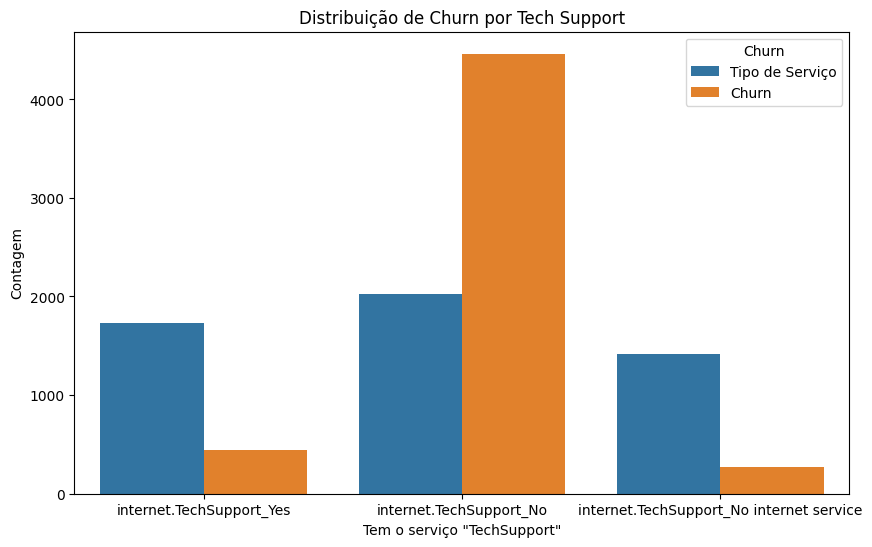

In [ ]:
# Gráfico de barras para 'TechSupport' em relação ao churn
dados_final['Servico TechSupport'] = dados_final[['internet.TechSupport_No','internet.TechSupport_Yes','internet.TechSupport_No internet service',]].idxmax(axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(x='Servico TechSupport', hue='Churn', data=dados_final)
plt.title('Distribuição de Churn por Tech Support')
plt.xlabel('Tem o serviço "TechSupport"')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Tipo de Serviço', 'Churn'])
plt.show()

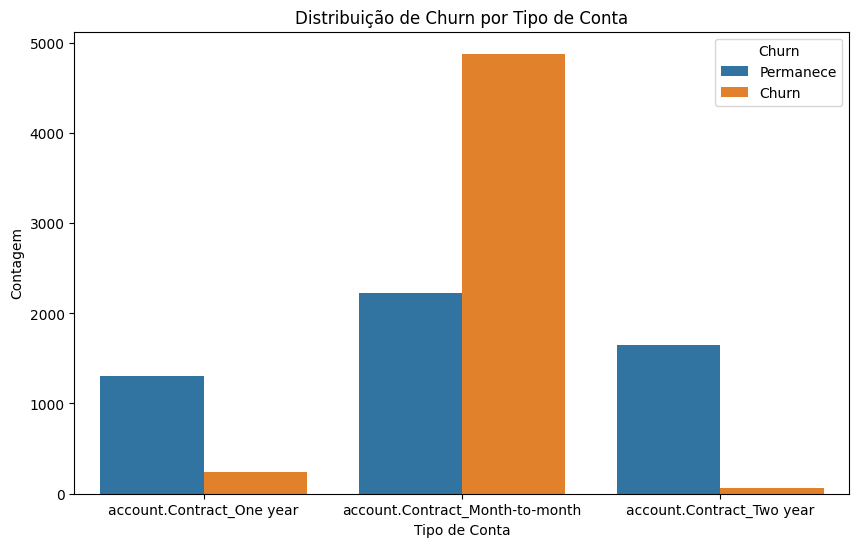

In [ ]:
# Gráfico de barras para 'account' em relação ao churn
dados_final['Tipo de contrato'] = dados_final[['account.Contract_Month-to-month','account.Contract_One year','account.Contract_Two year',]].idxmax(axis=1)
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo de contrato', hue='Churn', data=dados_final)
plt.title('Distribuição de Churn por Tipo de Conta')
plt.xlabel('Tipo de Conta')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Permanece', 'Churn'])
plt.show()

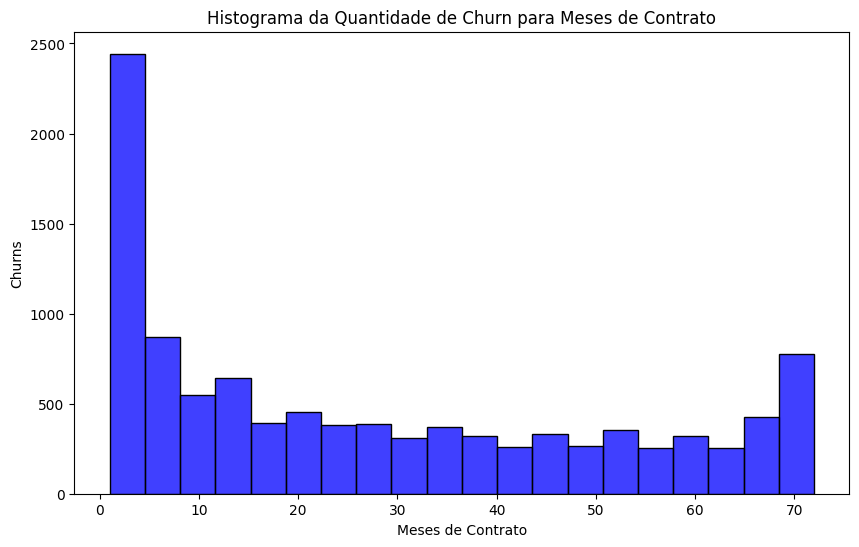

In [ ]:
#Histograma para 'customer.tenure' em relação ao Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=dados_final, x='customer.tenure', bins=20, color='blue')
plt.title('Histograma da Quantidade de Churn para Meses de Contrato')
plt.xlabel('Meses de Contrato')
plt.ylabel('Churns')
plt.show()

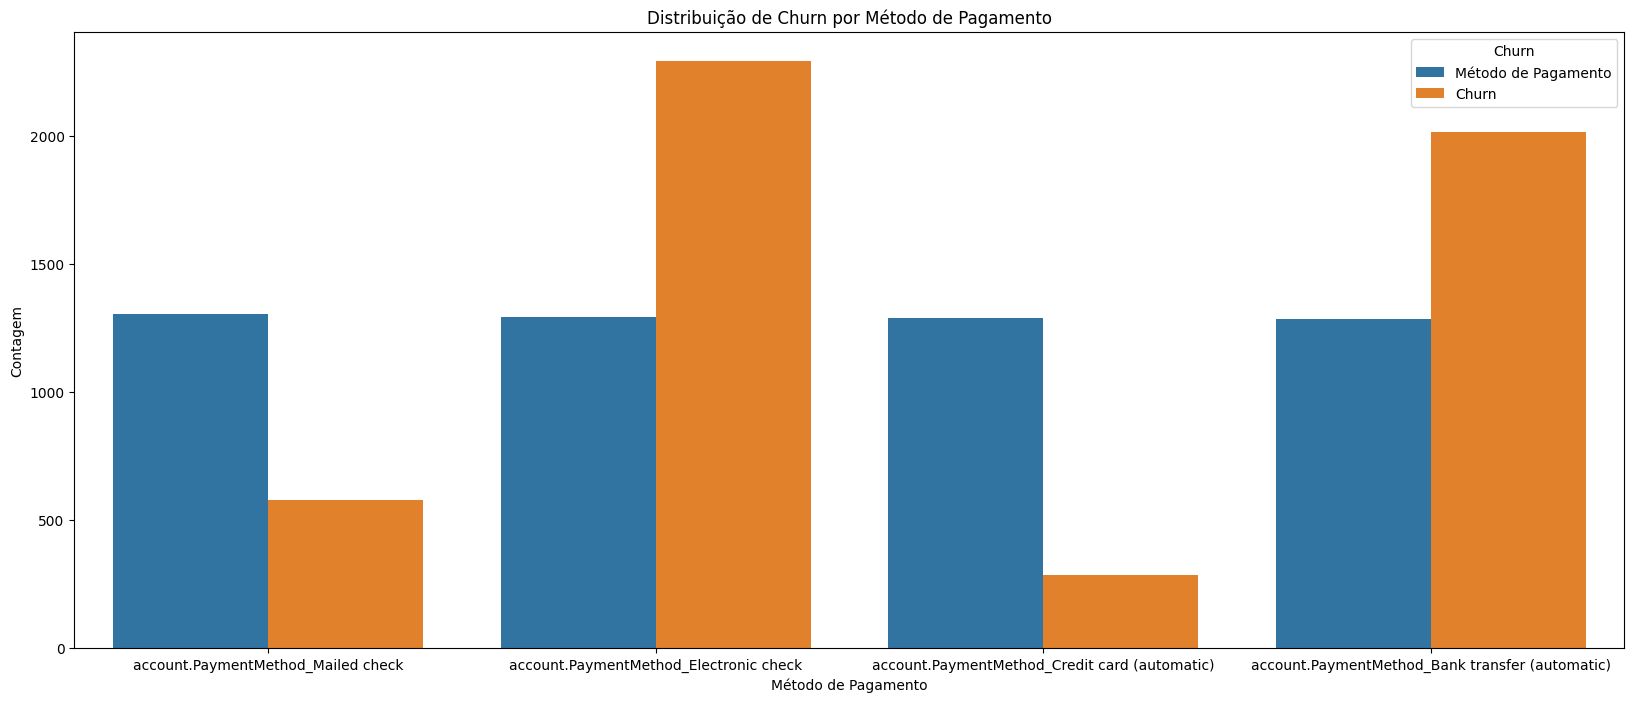

In [ ]:
# Gráfico de barras para 'PaymentMethod' em relação ao churn
dados_final['Método de Pagamento'] = dados_final[['account.PaymentMethod_Bank transfer (automatic)','account.PaymentMethod_Credit card (automatic)','account.PaymentMethod_Electronic check','account.PaymentMethod_Mailed check']].idxmax(axis=1)
plt.figure(figsize=(20, 8))
sns.countplot(x='Método de Pagamento', hue='Churn', data=dados_final)
plt.title('Distribuição de Churn por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Método de Pagamento', 'Churn'])
plt.show()

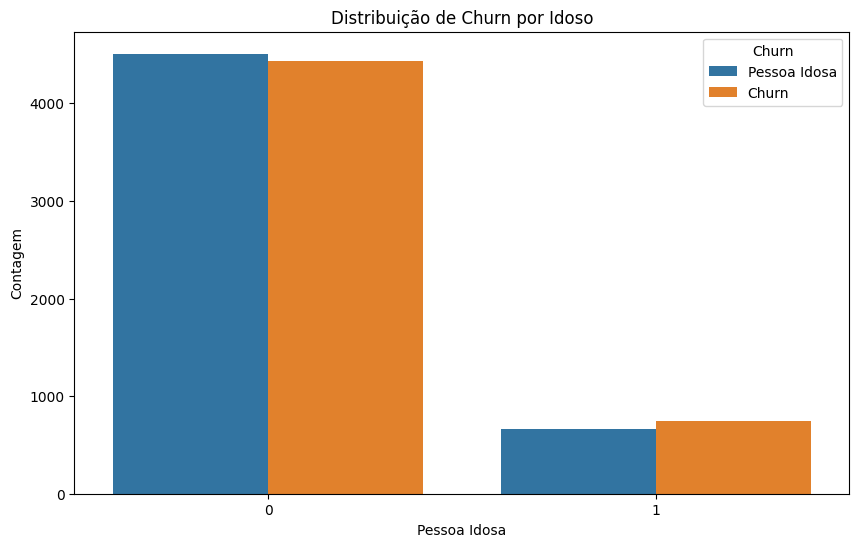

In [ ]:
# Gráfico de barras para 'SeniorCitizen' em relação ao churn
plt.figure(figsize=(10, 6))
sns.countplot(x='customer.SeniorCitizen', hue='Churn', data=dados_final)
plt.title('Distribuição de Churn por Idoso')
plt.xlabel('Pessoa Idosa')
plt.ylabel('Contagem')
plt.legend(title='Churn', labels=['Pessoa Idosa', 'Churn'])
plt.show()

outras comparações (fora do que foi pedido no trello do projeto)

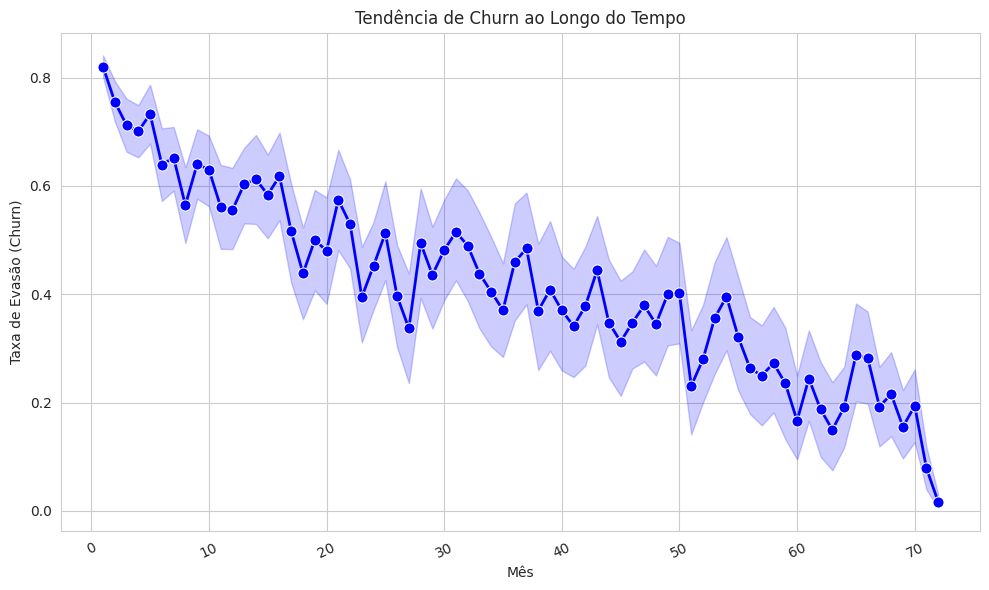

In [ ]:
#Gráfico de tendência para 'customer.tenure' em relação ao Churn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(x='customer.tenure', y='Churn', data=dados_final, marker='o', markersize=8, color='blue', linewidth=2)
plt.xlabel('Mês')
plt.ylabel('Taxa de Evasão (Churn)')
plt.title('Tendência de Churn ao Longo do Tempo')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

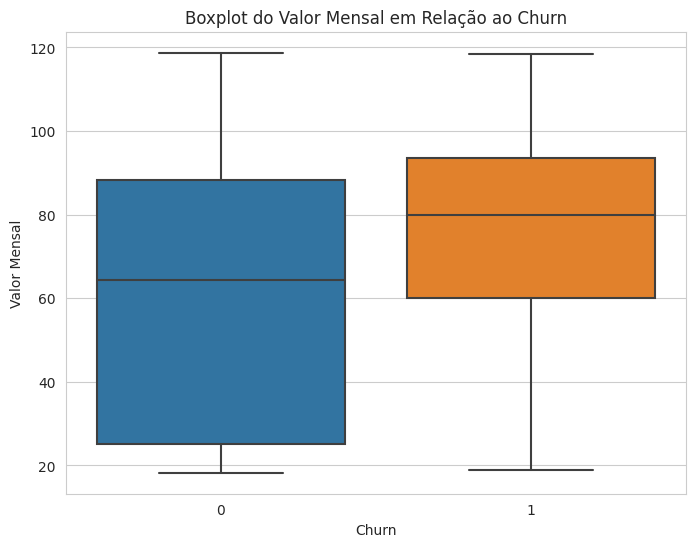

In [ ]:
#Boxplot para 'Charges.Monthly' em relação ao churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=dados_final)
plt.title('Boxplot do Valor Mensal em Relação ao Churn')
plt.xlabel('Churn')
plt.ylabel('Valor Mensal')
plt.show()

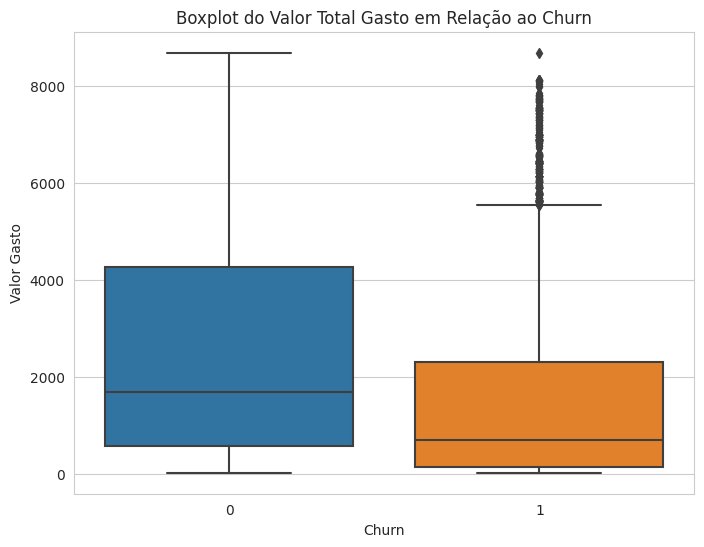

In [ ]:
#Boxplot para 'Charges.Total' em relação ao churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=dados_final)
plt.title('Boxplot do Valor Total Gasto em Relação ao Churn')
plt.xlabel('Churn')
plt.ylabel('Valor Gasto')
plt.show()

#Visualizando correlação das variáveis

In [ ]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10348 entries, 0 to 10347
Data columns (total 48 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   customer.gender                                  10348 non-null  int64  
 1   customer.SeniorCitizen                           10348 non-null  int64  
 2   customer.Partner                                 10348 non-null  int64  
 3   customer.Dependents                              10348 non-null  int64  
 4   customer.tenure                                  10348 non-null  int64  
 5   phone.PhoneService                               10348 non-null  int64  
 6   account.PaperlessBilling                         10348 non-null  int64  
 7   account.Charges.Monthly                          10348 non-null  float64
 8   account.Charges.Total                            10348 non-null  float64
 9   phone.MultipleLines_No      

In [ ]:
# selecionando as colunas contendo variáveis numéricas
correlation_matrix = dados_final[['Churn','customer.gender','customer.SeniorCitizen','internet.InternetService_DSL','internet.InternetService_Fiber optic','internet.InternetService_No','internet.OnlineSecurity_No','internet.OnlineSecurity_Yes','internet.OnlineSecurity_No internet service','internet.OnlineBackup_No','internet.OnlineBackup_Yes','internet.OnlineBackup_No internet service','internet.DeviceProtection_No','internet.DeviceProtection_Yes','internet.DeviceProtection_No internet service','internet.TechSupport_No','internet.TechSupport_Yes','internet.TechSupport_No internet service','account.Contract_Month-to-month','account.Contract_One year','account.Contract_Two year','account.PaymentMethod_Bank transfer (automatic)','account.PaymentMethod_Credit card (automatic)','account.PaymentMethod_Electronic check','account.PaymentMethod_Mailed check',]].corr()

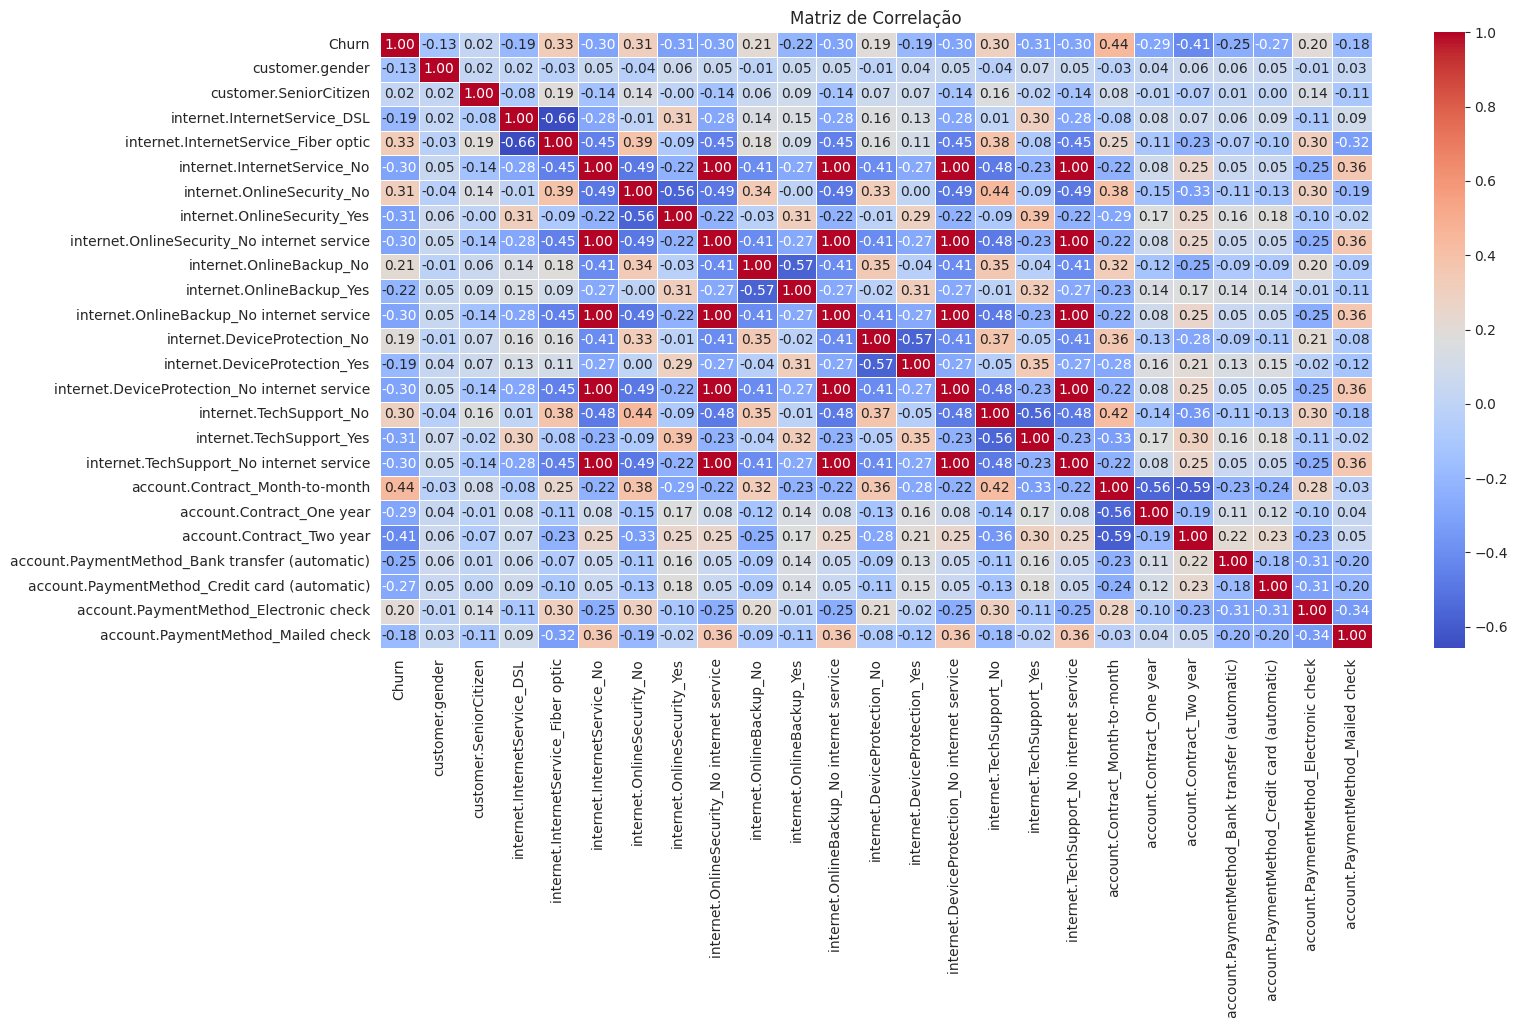

In [ ]:
#gerando o gráfico da matriz de correlação

plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Criando modelo de Machine Learn

DIVIDINDO DADOS DE TREINO E TESTE

In [ ]:
from sklearn.model_selection import train_test_split

# Selecionar as colunas relevantes para as features
features = ['customer.gender','customer.SeniorCitizen','internet.InternetService_DSL','internet.InternetService_Fiber optic','internet.InternetService_No','internet.OnlineSecurity_No','internet.OnlineSecurity_Yes','internet.OnlineSecurity_No internet service','internet.OnlineBackup_No','internet.OnlineBackup_Yes','internet.OnlineBackup_No internet service','internet.DeviceProtection_No','internet.DeviceProtection_Yes','internet.DeviceProtection_No internet service','internet.TechSupport_No','internet.TechSupport_Yes','internet.TechSupport_No internet service','account.Contract_Month-to-month','account.Contract_One year','account.Contract_Two year','account.PaymentMethod_Bank transfer (automatic)','account.PaymentMethod_Credit card (automatic)','account.PaymentMethod_Electronic check','account.PaymentMethod_Mailed check']

X = dados_final[features]  # Features
y = dados_final['Churn']  # Rótulos

# Dividir os dados em conjuntos de treinamento e teste (exemplo: 80% treinamento, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#verificando Dimensões dos Conjuntos

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8278, 24)
X_test shape: (2070, 24)
y_train shape: (8278,)
y_test shape: (2070,)


In [ ]:
#Visualizando Dados

print("Conjunto de Treinamento (X_train):")
print(X_train.head())

print("Conjunto de Teste (X_test):")
print(X_test.head())

print("Rótulos de Treinamento (y_train):")
print(y_train.head())

print("Rótulos de Teste (y_test):")
print(y_test.head())

Conjunto de Treinamento (X_train):
       customer.gender  customer.SeniorCitizen  internet.InternetService_DSL  \
4541                 0                       0                             1   
5709                 0                       0                             0   
7393                 0                       0                             1   
10026                0                       1                             0   
3578                 0                       1                             0   

       internet.InternetService_Fiber optic  internet.InternetService_No  \
4541                                      0                            0   
5709                                      0                            1   
7393                                      0                            0   
10026                                     1                            0   
3578                                      1                            0   

       internet.OnlineSecur

In [ ]:
#Verificando se os Rótulos estão Balanceados

print("Distribuição de Classes nos Rótulos de Treinamento:")
print(y_train.value_counts())

print("Distribuição de Classes nos Rótulos de Teste:")
print(y_test.value_counts())

Distribuição de Classes nos Rótulos de Treinamento:
0    4147
1    4131
Name: Churn, dtype: int64
Distribuição de Classes nos Rótulos de Teste:
1    1043
0    1027
Name: Churn, dtype: int64


TREINANDO O MODELO

- regressão logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Crie uma instância do modelo
modelo = LogisticRegression()

# Treine o modelo com os dados de treinamento
modelo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Acurácia: 0.8444444444444444
Precisão: 0.8572844400396432
Recall: 0.8293384467881112
F1-Score: 0.8430799220272904


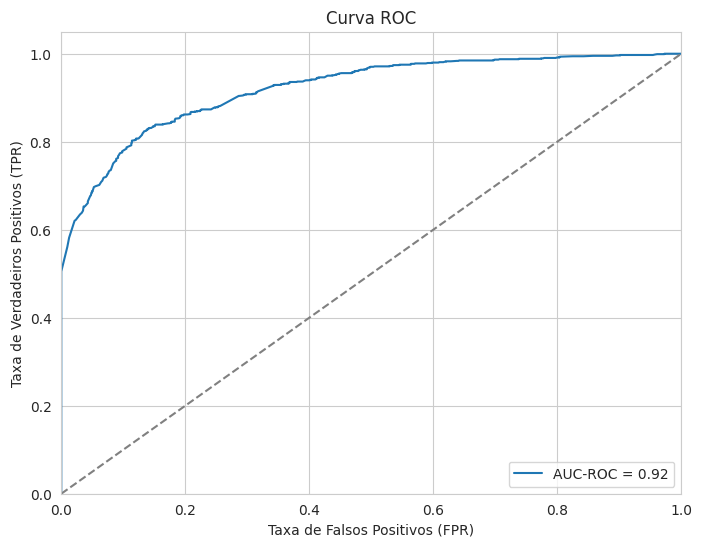

AUC-ROC: 0.92


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular as probabilidades de previsão para a classe positiva
y_prob = modelo.predict_proba(X_test)[:, 1]

# Calcular a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular a Área sob a Curva ROC (AUC-ROC)
auc_roc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

print(f'AUC-ROC: {auc_roc:.2f}')

- Modelo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Crie uma instância do modelo KNN
modelo_knn = KNeighborsClassifier(metric='euclidean')

In [ ]:
# Treine o modelo com os dados de treinamento
modelo_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# Faça previsões no conjunto de teste
y_pred_knn = modelo_knn.predict(X_test)

In [ ]:
y_pred_knn

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# Calcule a acurácia do modelo
acuracia_knn = accuracy_score(y_test, y_pred_knn)
print(f'Acurácia do KNN: {acuracia_knn:.2f}')

# Exiba o relatório de classificação
print(classification_report(y_test, y_pred_knn))

Acurácia do KNN: 0.81
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1027
           1       0.83      0.79      0.81      1043

    accuracy                           0.81      2070
   macro avg       0.81      0.81      0.81      2070
weighted avg       0.81      0.81      0.81      2070



- Modelo de Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Crie uma instância do modelo Naive Bayes de Bernoulli
modelo_bernoulli_naive_bayes = BernoulliNB()

In [ ]:
# Treine o modelo com os dados de treinamento
modelo_bernoulli_naive_bayes.fit(X_train, y_train)

BernoulliNB()

In [ ]:
# Faça previsões no conjunto de teste
y_pred_bernoulli_naive_bayes = modelo_bernoulli_naive_bayes.predict(X_test)

In [ ]:
y_pred_bernoulli_naive_bayes

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# Calcule a acurácia do modelo
acuracia_bernoulli_naive_bayes = accuracy_score(y_test, y_pred_bernoulli_naive_bayes)
print(f'Acurácia do Naive Bayes de Bernoulli: {acuracia_bernoulli_naive_bayes:.2f}')

# Exiba o relatório de classificação
print(classification_report(y_test, y_pred_bernoulli_naive_bayes))

Acurácia do Naive Bayes de Bernoulli: 0.78
              precision    recall  f1-score   support

           0       0.81      0.71      0.76      1027
           1       0.75      0.84      0.79      1043

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



- Modelo Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Crie uma instância do modelo de Árvore de Decisão
modelo_arvore_decisao = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Treine o modelo com os dados de treinamento
modelo_arvore_decisao.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Faça previsões no conjunto de teste
y_pred_arvore_decisao = modelo_arvore_decisao.predict(X_test)

In [ ]:
y_pred_arvore_decisao

array([1, 0, 1, ..., 1, 0, 1])

In [ ]:
# Calcule a acurácia do modelo
acuracia_arvore_decisao = accuracy_score(y_test, y_pred_arvore_decisao)
print(f'Acurácia da Árvore de Decisão: {acuracia_arvore_decisao:.2f}')

# Exiba o relatório de classificação
print(classification_report(y_test, y_pred_arvore_decisao))

Acurácia da Árvore de Decisão: 0.83
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1027
           1       0.84      0.80      0.82      1043

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



# Escolhendo o Melhor Modelo

- Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

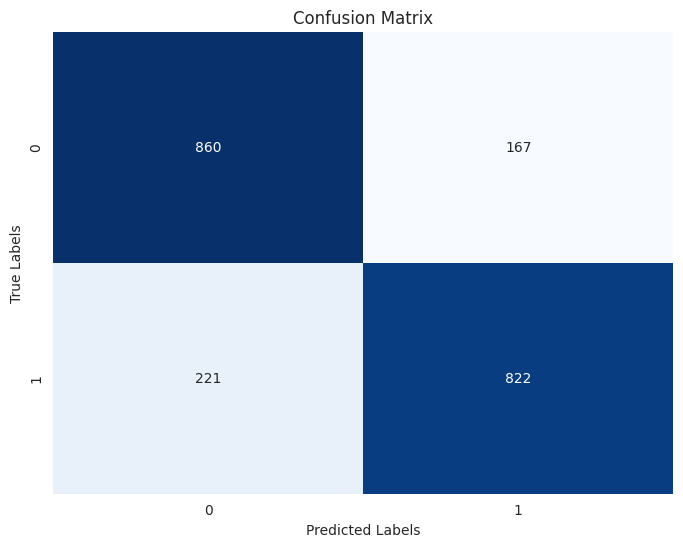

In [ ]:
# Calcular a matriz de confusão do Modelo KNN
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

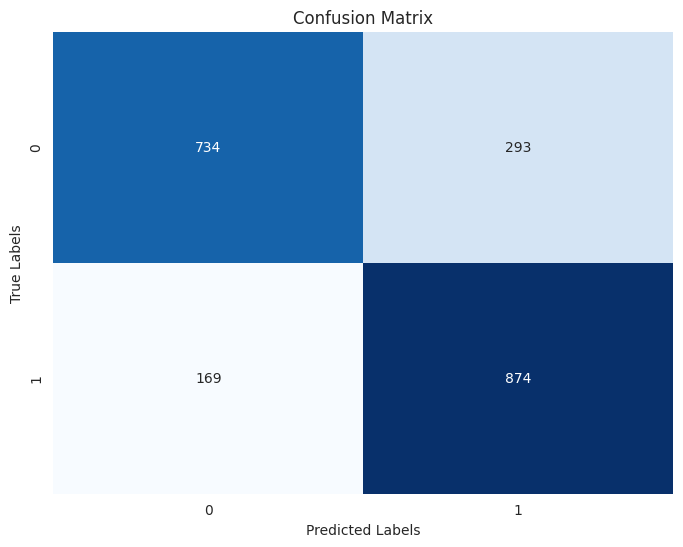

In [ ]:
# Calcular a matriz de confusão do Modelo de Naive Bayes
conf_matrix = confusion_matrix(y_test, y_pred_bernoulli_naive_bayes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

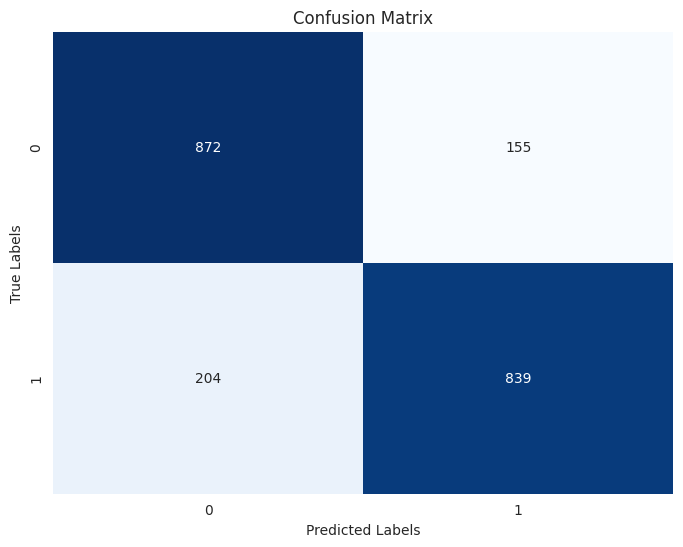

In [ ]:
# Calcular a matriz de confusão do Modelo Árvore de Decisão
conf_matrix = confusion_matrix(y_test, y_pred_arvore_decisao)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

- Tipos de métricas: acurácia

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
acuracia_knn = accuracy_score(y_test, y_pred_knn)
acuracia_knn

0.81256038647343

In [ ]:
acuracia_bernoulli_naive_bayes = accuracy_score(y_test, y_pred_bernoulli_naive_bayes)
acuracia_bernoulli_naive_bayes

0.7768115942028986

In [ ]:
acuracia_arvore_decisao = accuracy_score(y_test, y_pred_arvore_decisao)
acuracia_arvore_decisao

0.8265700483091788

- Tipos de métricas: precisão

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precisao_knn = precision_score(y_test, y_pred_knn)
precisao_knn

0.8311425682507584

In [ ]:
precisao_bernoulli_naive_bayes = precision_score(y_test, y_pred_bernoulli_naive_bayes)
precisao_bernoulli_naive_bayes

0.7489288774635818

In [ ]:
precisao_arvore_decisao = precision_score(y_test, y_pred_arvore_decisao)
precisao_arvore_decisao

0.8440643863179075

- Tipos de métricas: recall

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_knn = recall_score(y_test, y_pred_knn)
recall_knn

0.788111217641419

In [ ]:
recall_bernoulli_naive_bayes = recall_score(y_test, y_pred_bernoulli_naive_bayes)
recall_bernoulli_naive_bayes

0.837967401725791

In [ ]:
recall_arvore_decisao = recall_score(y_test, y_pred_arvore_decisao)
recall_arvore_decisao

0.8044103547459253

In [ ]:
# Fazer previsões do modelo Árvore de Decisão
y_pred_arvore_decisao = modelo_arvore_decisao.predict(X_test)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred_arvore_decisao)
precision = precision_score(y_test, y_pred_arvore_decisao)
recall = recall_score(y_test, y_pred_arvore_decisao)
f1 = f1_score(y_test, y_pred_arvore_decisao)

print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

Acurácia: 0.8265700483091788
Precisão: 0.8440643863179075
Recall: 0.8044103547459253
F1-Score: 0.8237604320078548


Modelo escolhido: Árvore de Decisão.

Métrica escolhida: Precisão.



O melhor modelo para este caso: A precisão, já que ela vai medir quantos valores positivos foram previstos de forma correta como um todo no nosso modelo. Os verdadeiros positivos são os 'Churn' igual a sim. Justamente o que queremos identificar, Que são as pessoas que estão deixando a empresa.

Matriz de Confusão

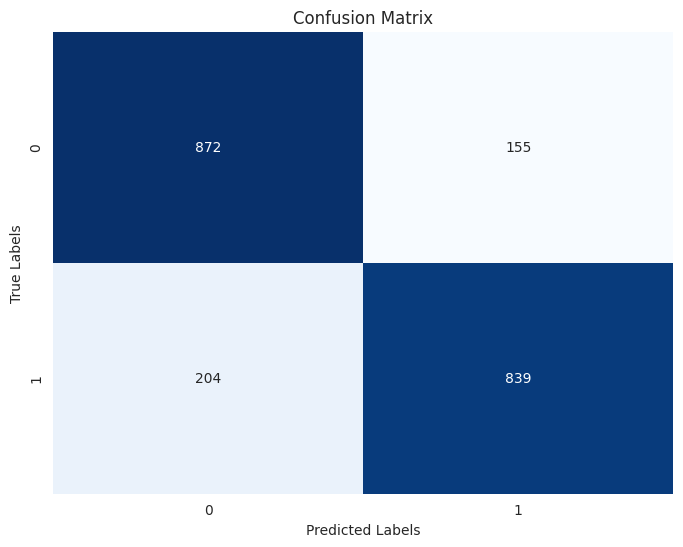

In [ ]:
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_arvore_decisao)

# Criar um heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Curva ROC e área sob a Curva AUC

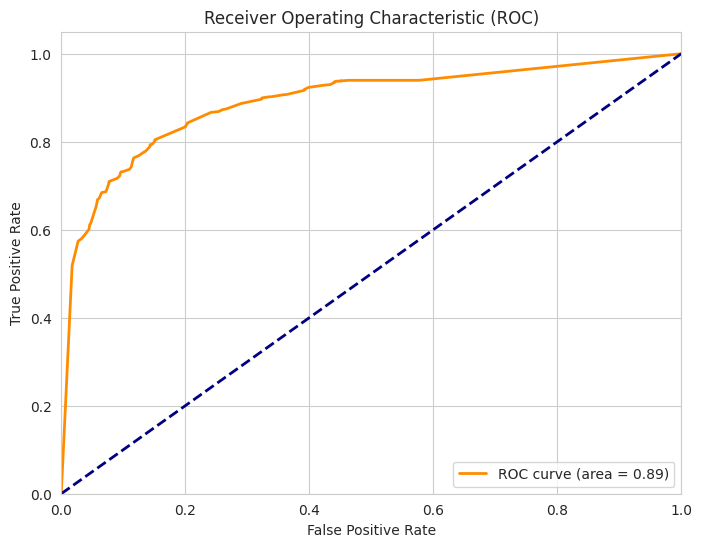

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular as probabilidades previstas para a classe positiva (classe '1')
y_prob = modelo_arvore_decisao.predict_proba(X_test)[:, 1]

# Calcular a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular a área sob a Curva ROC (AUC)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

Feature Importance

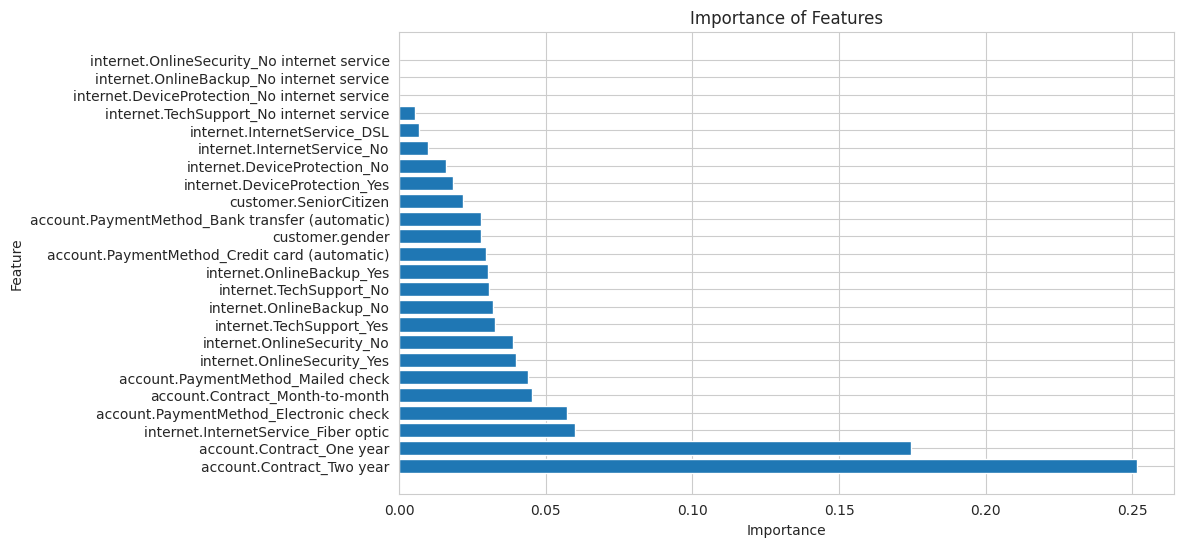

In [ ]:
import matplotlib.pyplot as plt

# Obtenha as importâncias das features
importances = modelo_arvore_decisao.feature_importances_

# Associe as importâncias às colunas/features correspondentes
feature_names = X_train.columns

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordene as importâncias em ordem decrescente
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# gráfico de barras das importâncias das features
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importance of Features')
plt.show()

Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [ ]:
num_folds = 5
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=123)

In [ ]:
scores = cross_val_score(modelo_arvore_decisao, X, y, cv=cv, scoring='precision')

In [ ]:
print("Pontuações da validação cruzada:", scores)
print("Acurácia média:", scores.mean())
print("Desvio padrão das pontuações:", scores.std())

Pontuações da validação cruzada: [0.82178218 0.84984985 0.83078491 0.80740038 0.81404175]
Acurácia média: 0.8247718133317168
Desvio padrão das pontuações: 0.01477094627610739


A precisão média do modelo é de cerca de 82.48%, o que é uma métrica importante, especialmente quando é fundamental evitar falsos positivos (quando o modelo prevê "Churn" erroneamente).

O desvio padrão relativamente baixo das pontuações de precisão indica que o modelo tem um desempenho consistente na métrica de precisão em diferentes partições dos dados.

# otimizando o melhor modelo

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Defina um espaço de hiperparâmetros a serem ajustados
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crie um objeto GridSearchCV para otimização
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='precision', cv=5)

# Ajuste o GridSearchCV aos dados de treinamento
grid_search.fit(X_train, y_train)

# Verifique os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores Hiperparâmetros:", best_params)

# Avalie o desempenho do modelo no conjunto de teste
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Acurácia do Melhor Modelo:", accuracy)

Melhores Hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Acurácia do Melhor Modelo: 0.8188405797101449


# Implantação de um modelo em um ambiente de produção

In [ ]:
import joblib

# Salve o modelo otimizado em um arquivo
joblib.dump(best_model, 'modelo_otimizado.pkl')

# Carregue o modelo de volta a partir do arquivo
loaded_model = joblib.load('modelo_otimizado.pkl')
